In [ ]:
#intuition
# step 1 - pick at random k data points from the training set
# step 2 - build the decision tree associated to these k data points
# step 3 - choose the number Ntree of trees you want to build and repeat steps 1 and 2
# step 4 - for a new data point, make each one of your Ntree trees predict the value of Y
# to for the data point in ques and assign the new data point the avg across all of the predicted y values

# above is what we call ensemble learning


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
data = pd.read_csv('Position_salaries.csv')

In [3]:
X = data.iloc[:,1:-1].values
X

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]], dtype=int64)

In [5]:
Y = data.iloc[:,-1].values
Y

array([  45000,   50000,   60000,   80000,  110000,  150000,  200000,
        300000,  500000, 1000000], dtype=int64)

In [20]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=10)

In [21]:
regressor.fit(X,Y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [22]:
regressor.predict([[6.5]])

array([161000.])

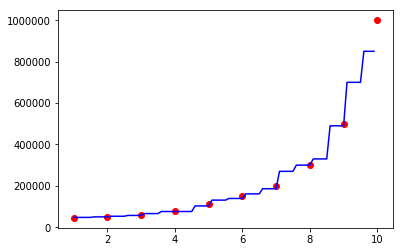

In [23]:
X_grid = np.arange(min(X),max(X),0.1)
X_grid = X_grid.reshape((len(X_grid),1))
plt.scatter(X,Y,color='red')
plt.plot(X_grid,regressor.predict(X_grid),color='blue')

In [ ]:
# R-squared 
#SSres = SUM(y - yi)^2
#SStol = SUM(yi-yavg)^2

#R-squared = (1 - (SSres/SStol))
#R-squared should be high as possible near to 1
#R-squared tells us how good our line is as compared to a horizantal avg line


In [ ]:
# Adjusted R-squared value
# the above intituition can be applied to multiple variables as well(i=1 to n)
# R-squared is bias . let say we have an equation y = b0 + b1x1
# now we add a variable x2 our eq becomes y = b0 + b1x1 +b2x2
#so in this case we have 2 use casse x2 is very much related to y and this helps increase r2 score
#else x3 is not at all related so our model will make b2 as 0
#hence r2 or rsquared will never decrease

# Adjusted R-square = 1 - (1-R^2)^((n-1)/(n-p-1))
# p - number of regressors
# n - sample size